In [1]:
# import modules
import xarray as xr
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy.ma as ma
import numpy as np
import netCDF4 as nc4
from datetime import datetime
from scipy.io import netcdf
from netCDF4 import Dataset

%matplotlib inline

In [2]:
QNWfile = '/home/albert/Data/NATL60/NATL60-I/NATL60QNW_bathy.nc'
QSWfile = '/home/albert/Data/NATL60/NATL60-I/NATL60QSW_bathy.nc'
QNEfile = '/home/albert/Data/NATL60/NATL60-I/NATL60QNE_bathy.nc'
QSEfile = '/home/albert/Data/NATL60/NATL60-I/NATL60QSE_bathy.nc'

In [3]:
fQNW = Dataset(QNWfile, "r", format="NETCDF4")
fQSW = Dataset(QSWfile, "r", format="NETCDF4")
fQNE = Dataset(QNEfile, "r", format="NETCDF4")
fQSE = Dataset(QSEfile, "r", format="NETCDF4")



In [4]:
bathyQNW=fQNW.variables['Bathymetry']
bathyQSW=fQSW.variables['Bathymetry']
bathyQNE=fQNE.variables['Bathymetry']
bathyQSE=fQSE.variables['Bathymetry']

In [9]:
maskQNW=np.equal(bathyQNW,0.)
maskQSW=np.equal(bathyQSW,0.)
maskQNE=np.equal(bathyQNE,0.)
maskQSE=np.equal(bathyQSE,0.)

bathyQNW_ma=np.ma.array(bathyQNW,mask=maskQNW)
bathyQSW_ma=np.ma.array(bathyQSW,mask=maskQSW)
bathyQNE_ma=np.ma.array(bathyQNE,mask=maskQNE)
bathyQSE_ma=np.ma.array(bathyQSE,mask=maskQSE)

In [5]:
navlonQNW=fQNW.variables['nav_lon']
navlatQNW=fQNW.variables['nav_lat']
navlonQSW=fQSW.variables['nav_lon']
navlatQSW=fQSW.variables['nav_lat']
navlonQNE=fQNE.variables['nav_lon']
navlatQNE=fQNE.variables['nav_lat']
navlonQSE=fQSE.variables['nav_lon']
navlatQSE=fQSE.variables['nav_lat']


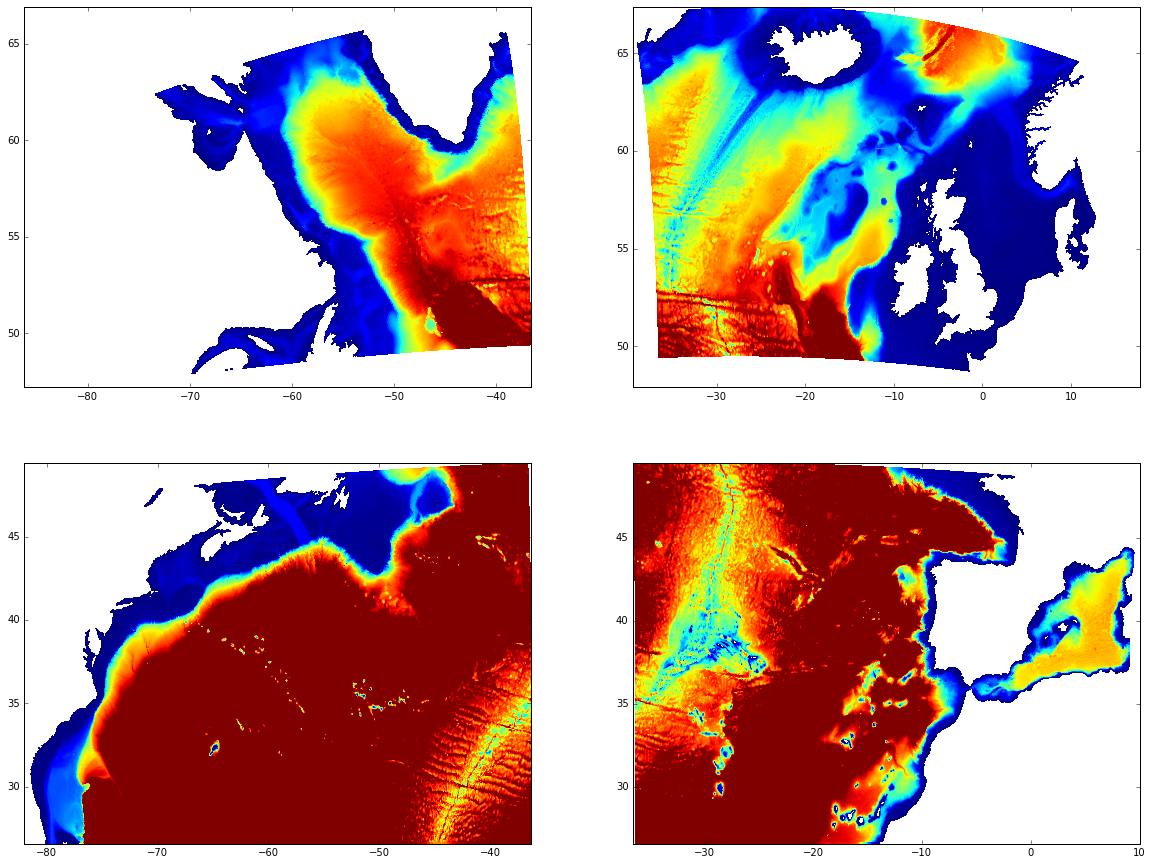

In [11]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.pcolormesh(navlonQNW,navlatQNW,bathyQNW_ma,vmin=0,vmax=4000.,cmap='jet')
plt.autoscale(tight=True)

plt.subplot(2,2,2)
plt.pcolormesh(navlonQNE,navlatQNE,bathyQNE_ma,vmin=0,vmax=4000.,cmap='jet')
plt.autoscale(tight=True)

plt.subplot(2,2,3)
plt.pcolormesh(navlonQSW,navlatQSW,bathyQSW_ma,vmin=0,vmax=4000.,cmap='jet')
plt.autoscale(tight=True)

plt.subplot(2,2,4)
plt.pcolormesh(navlonQSE,navlatQSE,bathyQSE_ma,vmin=0,vmax=4000.,cmap='jet')
plt.autoscale(tight=True)


plt.savefig('/home/albert/Data/NATL60/PLOTS/bathy_decoupage_4quarts.png')